import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
df=pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
print("Available Columns in Dataset:\n", df.columns.tolist())


Available Columns in Dataset:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_v

In [6]:
metrics = [
    "new_cases_per_million", "total_cases_per_million", "new_deaths_per_million", 
    "total_deaths_per_million",  "total_vaccinations_per_hundred", "total_vaccinations",
    "new_tests",  "hosp_patients_per_million", "reproduction_rate", "total_tests",
    "new_cases", "new_deaths", "stringency_index"
]
countries = ["India", "United States", "Brazil", "United Kingdom", "South Africa"]



Data cleaning

In [7]:
print("NUll Value counts :\n",df.isnull().sum())
for col in metrics:
    if col in df.columns:
        df[col]=df[col].fillna(0)
    else:
        print (f"warrning :column '{col}'not found in dataset")    

NUll Value counts :
 iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [8]:
country_data=df[df["location"].isin(countries)]

Country-Wise Trends for Per-Million Metrics

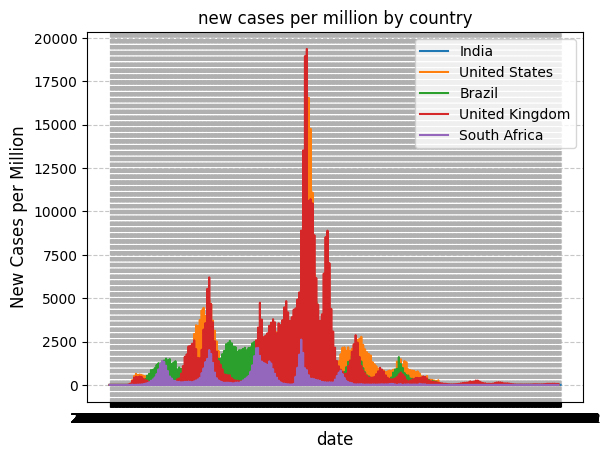

In [9]:
plt.Figure(figsize=(14,8))
for country in countries:
    country_subset=country_data[country_data["location"]==country]
    plt.plot(country_subset["date"],country_subset["new_cases_per_million"],label=country)
plt.title("new cases per million by country",fontsize=12)
plt.xlabel("date",fontsize=12)  
plt.ylabel("New Cases per Million", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()  

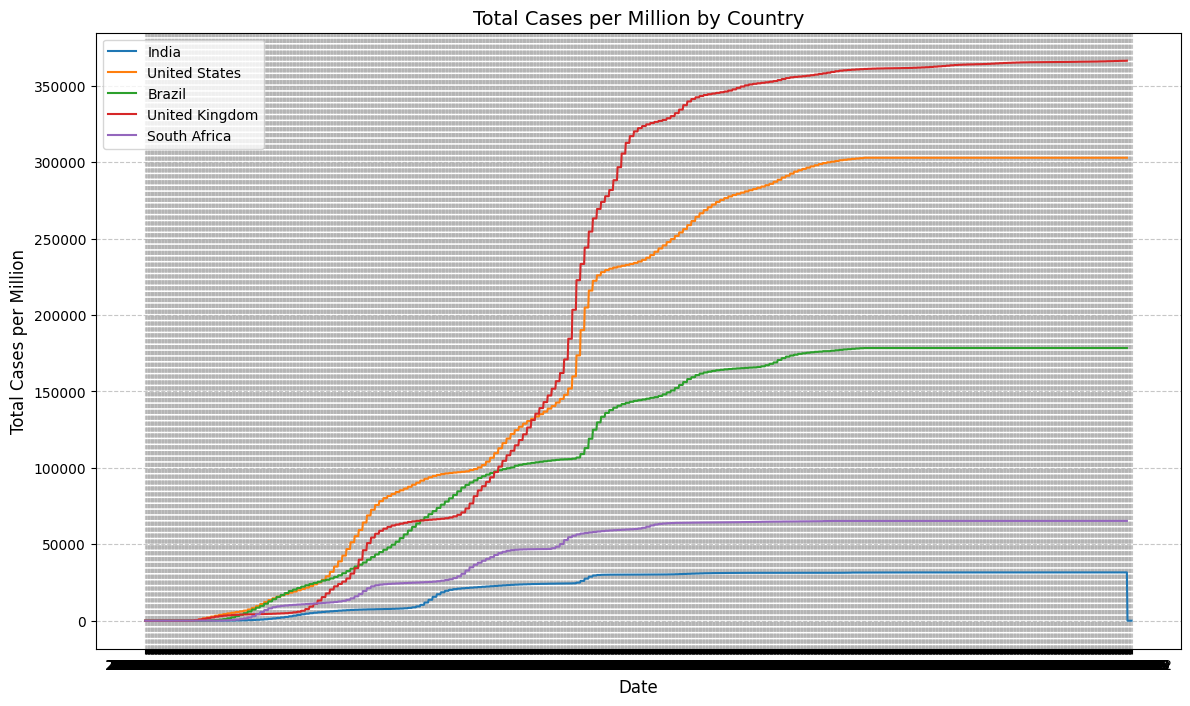

In [10]:
plt.figure(figsize=(14, 8))
for country in countries:
    country_subset = country_data[country_data["location"] == country]
    plt.plot(country_subset["date"], country_subset["total_cases_per_million"], label=country)
plt.title("Total Cases per Million by Country", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cases per Million", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

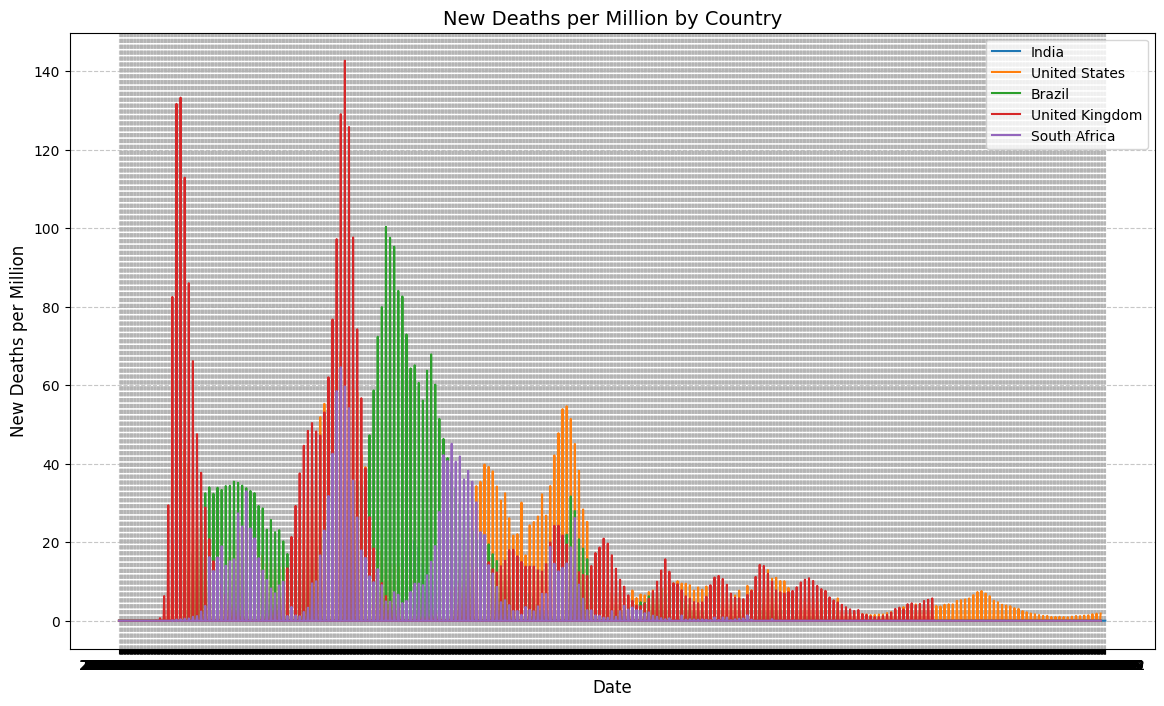

In [11]:
plt.figure(figsize=(14, 8))
for country in countries:
    country_subset = country_data[country_data["location"] == country]
    plt.plot(country_subset["date"], country_subset["new_deaths_per_million"], label=country)
plt.title("New Deaths per Million by Country", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Deaths per Million", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

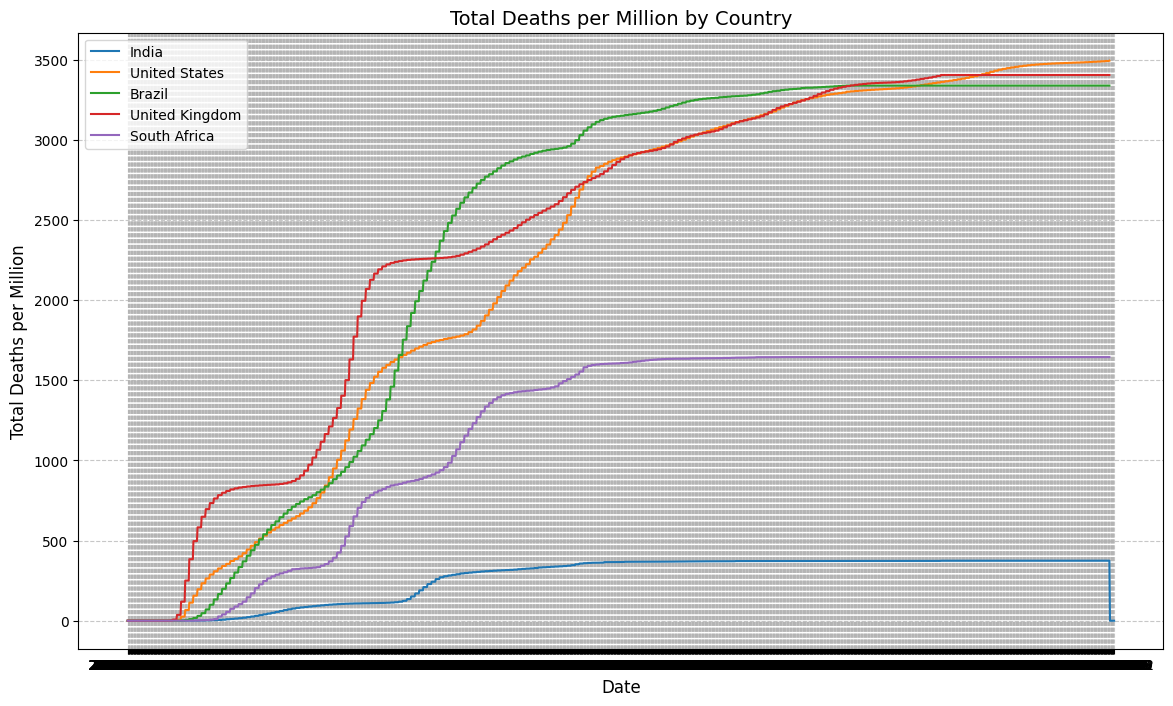

In [12]:
plt.figure(figsize=(14, 8))
for country in countries:
    country_subset = country_data[country_data["location"] == country]
    plt.plot(country_subset["date"], country_subset["total_deaths_per_million"], label=country)
plt.title("Total Deaths per Million by Country", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Deaths per Million", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


country wise reprentation

In [13]:
india_data=df[df["location"]=="India"]

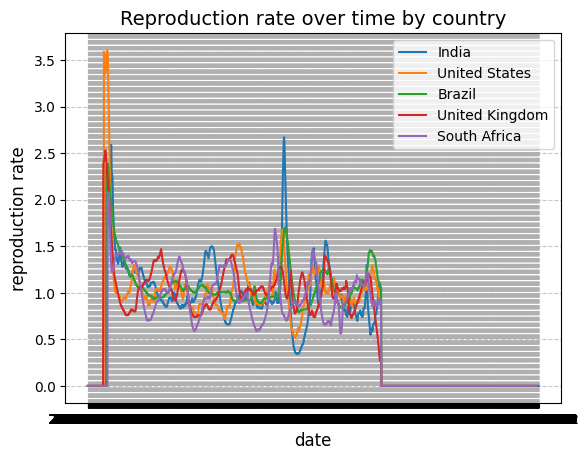

In [14]:
plt.Figure(figsize=(14,8))
for country in countries:
    country_subset=country_data[country_data["location"]==country]
    plt.plot(country_subset["date"],country_subset["reproduction_rate"],label=country)
plt.title("Reproduction rate over time by country",fontsize=14)
plt.xlabel("date",fontsize=12)
plt.ylabel("reproduction rate",fontsize=12)
plt.legend()
plt.grid(True,linestyle='--',alpha=0.7)

    

scatter plot:- vaccination vs deaths 

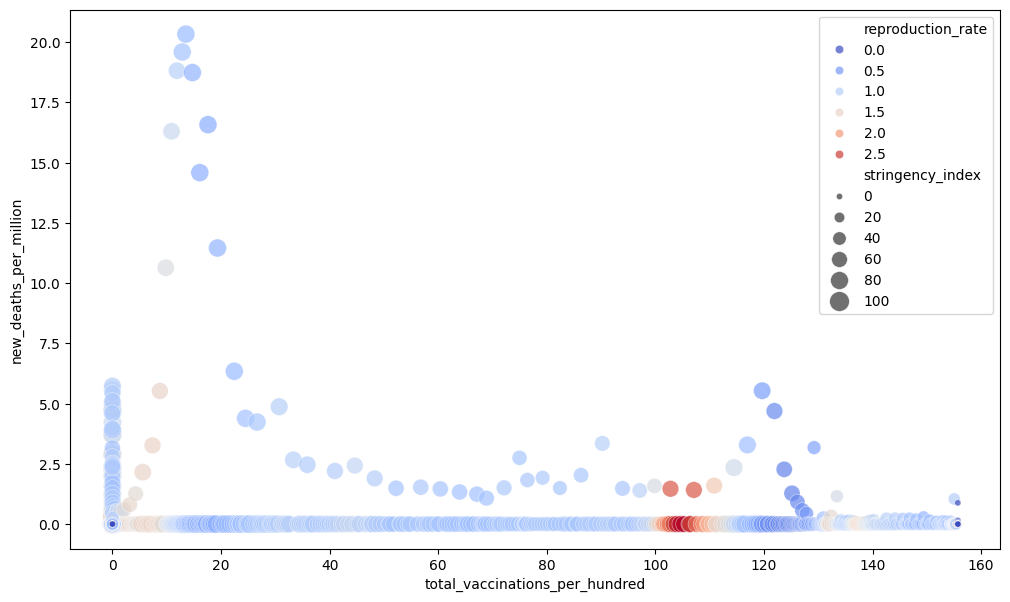

In [15]:
plt.figure(figsize=(12,7))
scatter=sns.scatterplot(
    x="total_vaccinations_per_hundred",
    y="new_deaths_per_million",
    size="stringency_index",# Point size reflects government restrictions
    # Color reflects reproduction rate
    hue="reproduction_rate",
    sizes=(20,200),
    palette="coolwarm",
    alpha=0.7,
    data=india_data
    
)

Factors Influencing Spread

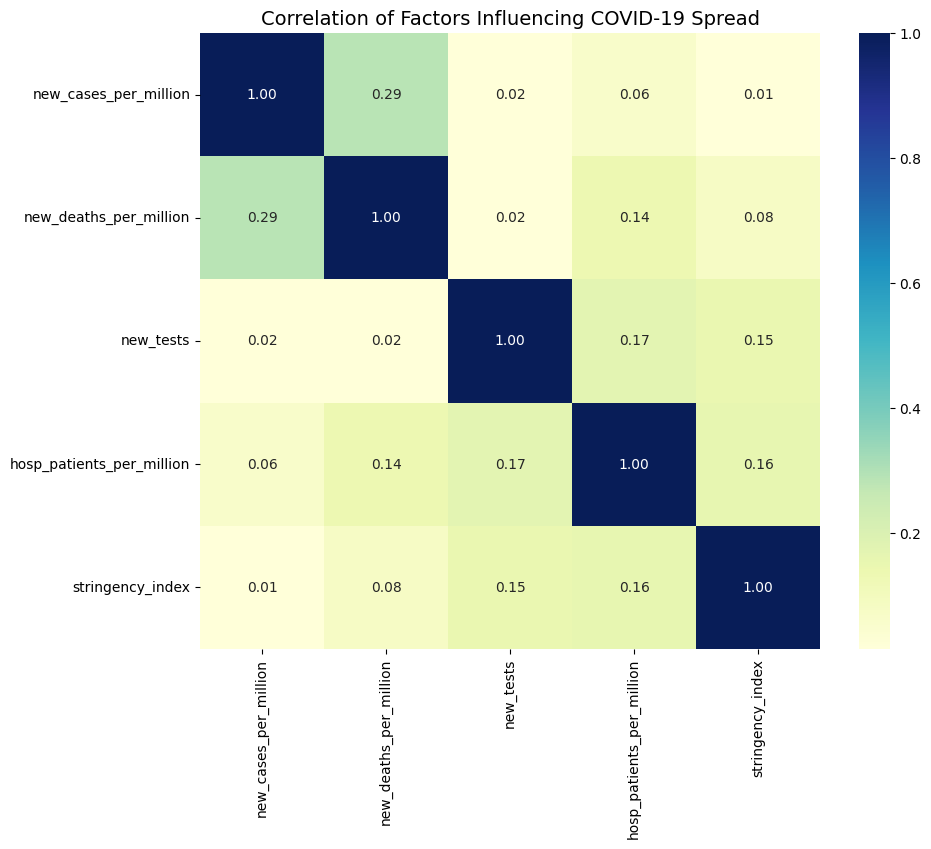

In [16]:
factors_data = df[["new_cases_per_million", "new_deaths_per_million", "new_tests", 
"hosp_patients_per_million", "stringency_index"]].dropna()
plt.figure(figsize=(10, 8))
sns.heatmap(factors_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation of Factors Influencing COVID-19 Spread", fontsize=14)
plt.show()


Regional Differences

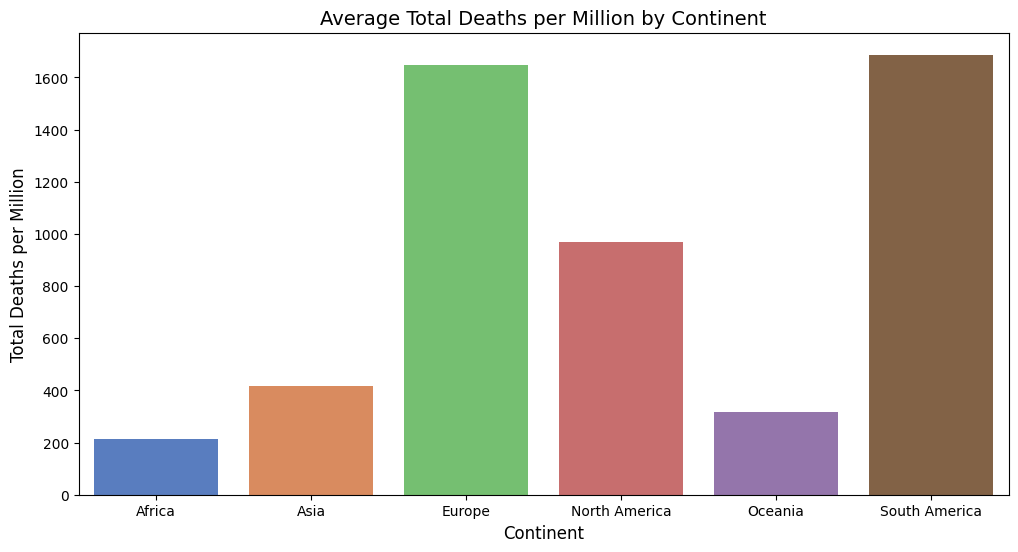

In [17]:
continent_data=df.groupby("continent")[["total_cases_per_million","total_deaths_per_million"]].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="continent", y="total_deaths_per_million", hue="continent", data=continent_data, palette="muted", legend=False)
plt.title("Average Total Deaths per Million by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Total Deaths per Million", fontsize=12)
plt.show()


improved Boxplot of New Cases by Continent (with log scale, better style)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7580\3031030426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='continent', ylabel='new_cases'>

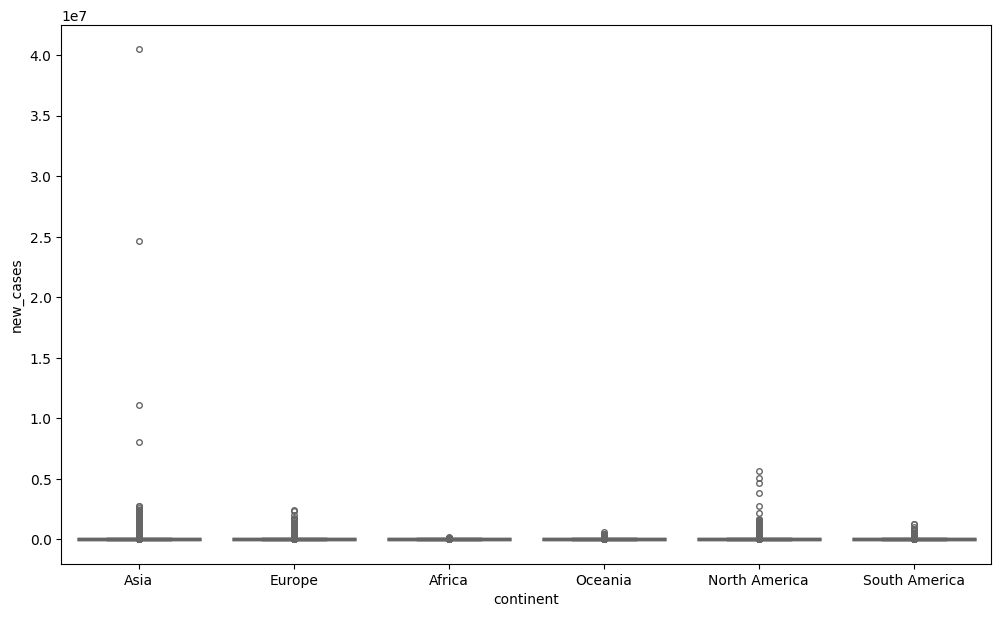

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    x="continent",
    y="new_cases",
    data=df,
    palette="Set3",
    linewidth=2.5,
    fliersize=4,
    boxprops=dict(alpha=0.8)
    
)

Pairplot

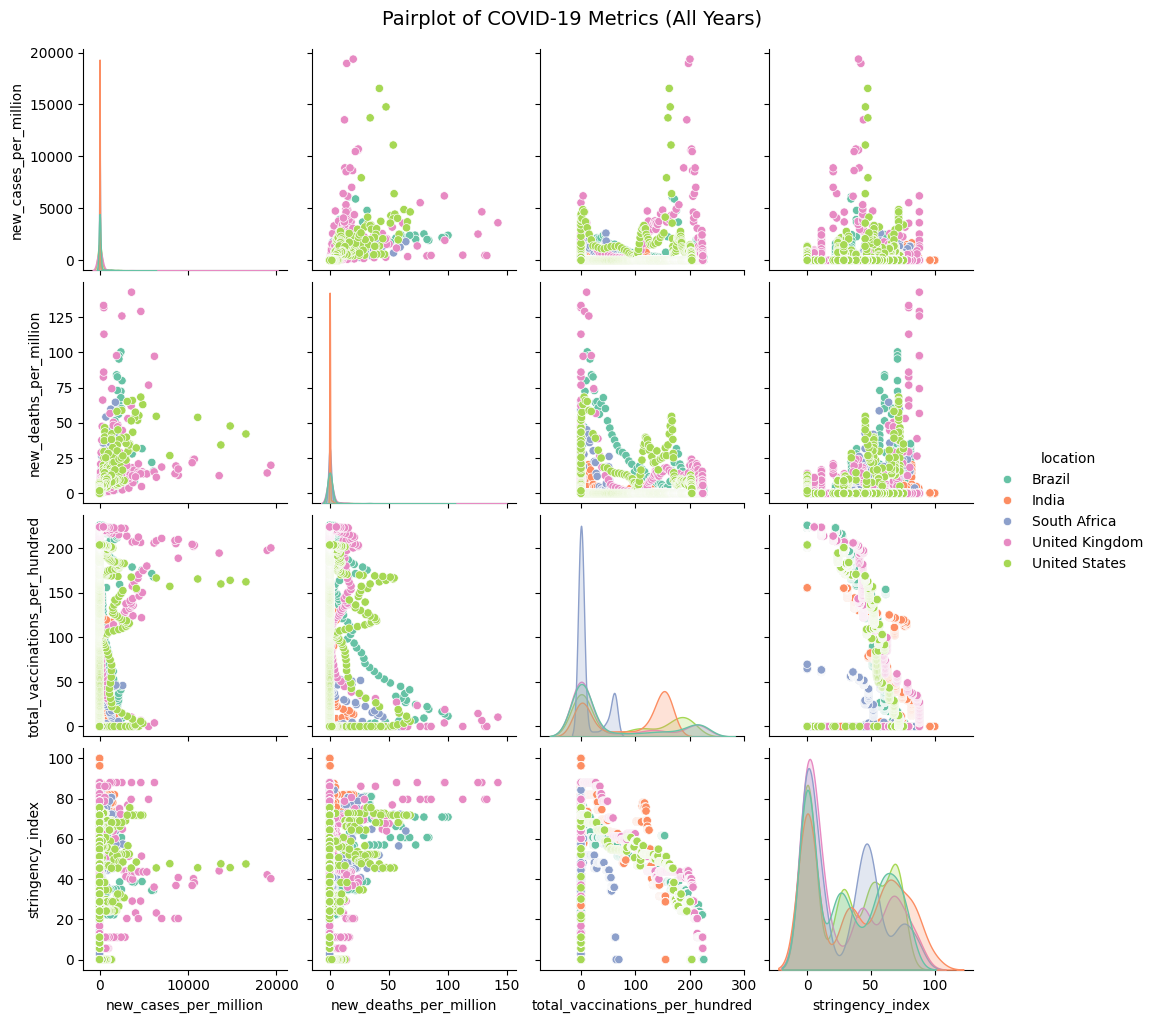

In [19]:
pairplot_metrics = ["new_cases_per_million", "new_deaths_per_million", 
                   "total_vaccinations_per_hundred", "stringency_index"]
data_subset = country_data[["location"] + pairplot_metrics].dropna()

sns.pairplot(data=data_subset, hue="location", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of COVID-19 Metrics (All Years)", y=1.02, fontsize=14)
plt.show()

 

In [20]:
 
print("\nSummary Statistics for New Cases per Million:")
print(df["new_cases_per_million"].describe())
print("\nTop 5 Outliers in New Cases per Million:")
print(df[["location", "date", "new_cases_per_million"]].sort_values(by="new_cases_per_million", ascending=False).head())



Summary Statistics for New Cases per Million:
count    429435.000000
mean        116.864846
std        1474.745179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      241758.230000
Name: new_cases_per_million, dtype: float64

Top 5 Outliers in New Cases per Million:
                 location        date  new_cases_per_million
322099       Saint Helena  2022-09-25              241758.23
422069  Wallis and Futuna  2022-10-16              230762.55
236283   Marshall Islands  2022-08-21              226617.45
124532   Falkland Islands  2022-05-15              208819.34
263015              Nauru  2022-06-26              173843.16


In [21]:
df.to_csv("c:\\Users\\Dell\\Documents\\Cleaned_Coivd_Dataset.csv")